In [91]:
import pandas as pd

def preprocess_df(df):
    # Clean Fatalities
    # Clean Fatalities: remove commas and plus signs
    df['Fatalities'] = (
        df['Fatalities']
        .astype(str)
        .str.replace(',', '', regex=False)  # <--- remove commas
        .str.replace('+', '', regex=False)  # <--- remove plus signs
    )
    
    # Convert to numeric
    df['Fatalities'] = pd.to_numeric(df['Fatalities'], errors='coerce').fillna(0).astype(int)


    # Split Time Period into Start and End Dates
    df[['Start_Date', 'End_Date']] = df['Time period'].str.split('–', expand=True)
    df['Start_Date'] = pd.to_datetime(df['Start_Date'].str.strip(), dayfirst=True, errors='coerce').dt.date
    df['End_Date'] = pd.to_datetime(df['End_Date'].str.strip(), dayfirst=True, errors='coerce').dt.date

    # Calculate duration in days
    df['Duration_Days'] = (pd.to_datetime(df['End_Date']) - pd.to_datetime(df['Start_Date'])).dt.days + 1

    return df

# Load datasets
df_ukr = pd.read_csv('ukraine-civilian.csv')
df_rus = pd.read_csv('russian-civilian.csv')

# Apply preprocessing
df_ukr = preprocess_df(df_ukr)
df_rus = preprocess_df(df_rus)


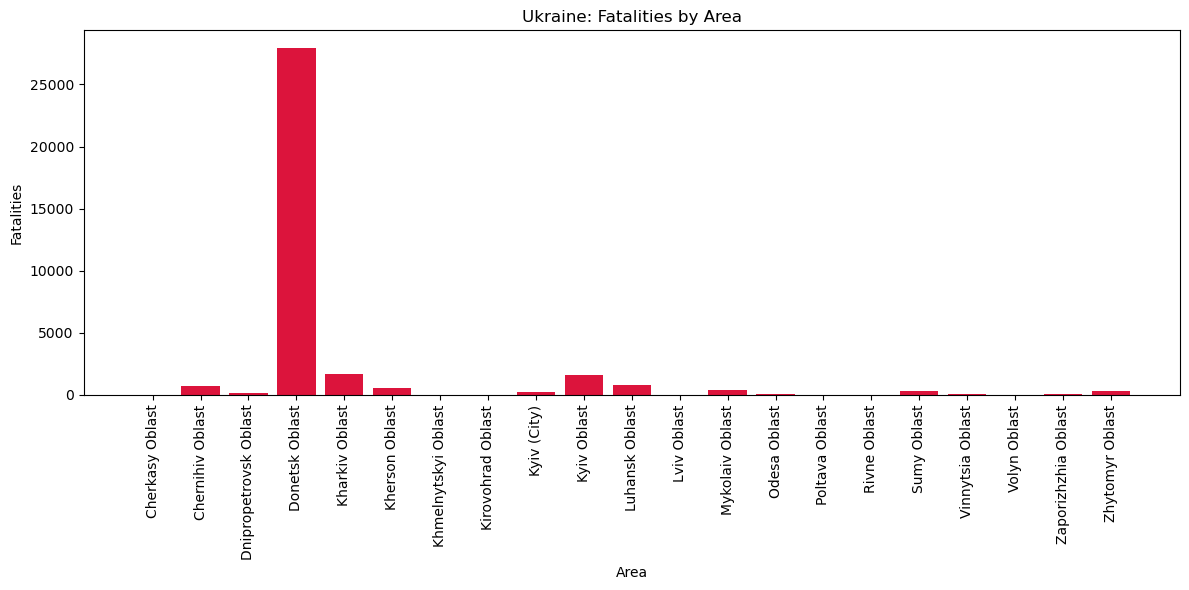

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(df_ukr['Area'], df_ukr['Fatalities'], color='crimson')
plt.xticks(rotation=90)
plt.title('Ukraine: Fatalities by Area')
plt.xlabel('Area')
plt.ylabel('Fatalities')
plt.tight_layout()
plt.show()


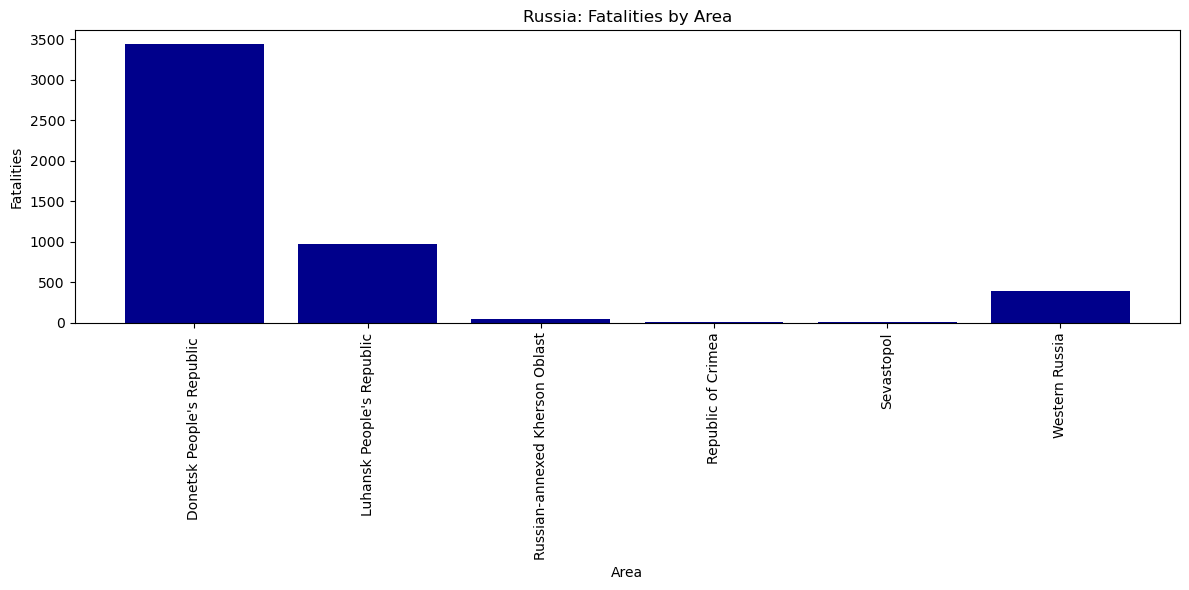

In [95]:
plt.figure(figsize=(12,6))
plt.bar(df_rus['Area'], df_rus['Fatalities'], color='darkblue')
plt.xticks(rotation=90)
plt.title('Russia: Fatalities by Area')
plt.xlabel('Area')
plt.ylabel('Fatalities')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalize_df(df):
    scaler = MinMaxScaler()
    df[['Fatalities_Norm', 'Duration_Norm']] = scaler.fit_transform(df[['Fatalities', 'Duration_Days']])
    return df

df_ukr = normalize_df(df_ukr)
df_rus = normalize_df(df_rus)

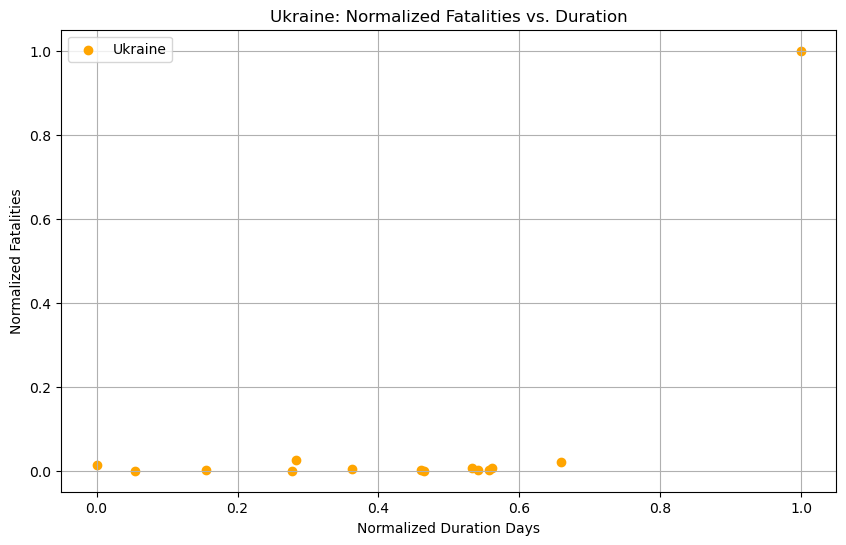

In [109]:
plt.figure(figsize=(10,6))
plt.scatter(df_ukr['Duration_Norm'], df_ukr['Fatalities_Norm'], color='orange', label='Ukraine')
plt.title('Ukraine: Normalized Fatalities vs. Duration')
plt.xlabel('Normalized Duration Days')
plt.ylabel('Normalized Fatalities')
plt.grid(True)
plt.legend()
plt.show()

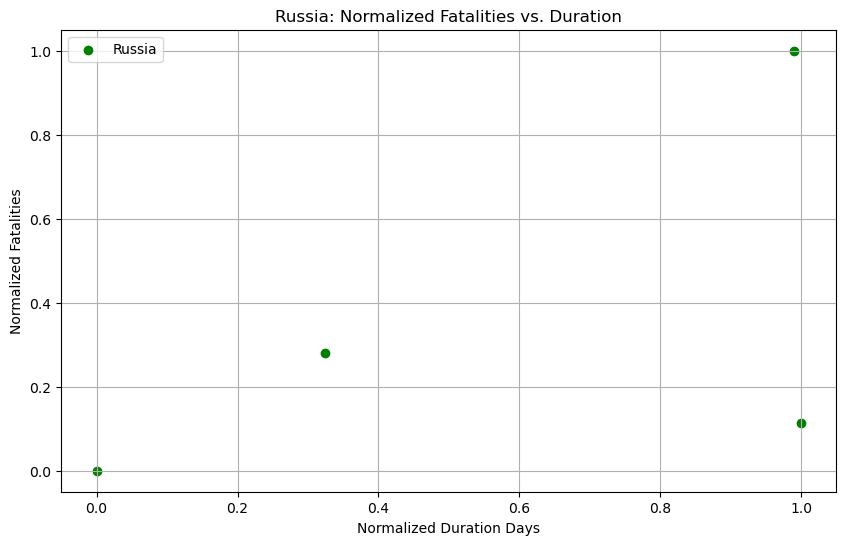

In [111]:
plt.figure(figsize=(10,6))
plt.scatter(df_rus['Duration_Norm'], df_rus['Fatalities_Norm'], color='green', label='Russia')
plt.title('Russia: Normalized Fatalities vs. Duration')
plt.xlabel('Normalized Duration Days')
plt.ylabel('Normalized Fatalities')
plt.grid(True)
plt.legend()
plt.show()


In [83]:
# Ensure no division by zero
df_ukr['Duration_Days'] = df_ukr['Duration_Days'].replace(0, 1)

# Calculate average fatalities per day
df_ukr['Fatalities_Per_Day'] = df_ukr['Fatalities'] / df_ukr['Duration_Days']

# View result
print(df_ukr[['Area', 'Fatalities', 'Duration_Days', 'Fatalities_Per_Day']].sort_values(by='Fatalities_Per_Day', ascending=False))

                     Area  Fatalities  Duration_Days  Fatalities_Per_Day
3          Donetsk Oblast       27958         1085.0           25.767742
1        Chernihiv Oblast         725          542.0            1.337638
12        Mykolaiv Oblast         413          328.0            1.259146
5          Kherson Oblast         566          827.0            0.684401
8             Kyiv (City)         200          731.0            0.273598
2   Dnipropetrovsk Oblast         171          753.0            0.227092
19    Zaporizhzhia Oblast          88          602.0            0.146179
13           Odesa Oblast          51          738.0            0.069106
11            Lviv Oblast          22          445.0            0.049438
17       Vinnytsia Oblast          30          750.0            0.040000
0         Cherkasy Oblast          26          676.0            0.038462
18           Volyn Oblast           8          538.0            0.014870
7       Kirovohrad Oblast           9          680.

In [85]:
# Group by Area and aggregate total fatalities and total duration
area_avg = df_ukr.groupby('Area').agg({
    'Fatalities': 'sum',
    'Duration_Days': 'sum'
}).reset_index()

# Compute average fatalities per day
area_avg['Fatalities_Per_Day'] = area_avg['Fatalities'] / area_avg['Duration_Days']

# Sort to see highest averages
area_avg = area_avg.sort_values(by='Fatalities_Per_Day', ascending=False)

print(area_avg)


                     Area  Fatalities  Duration_Days  Fatalities_Per_Day
10         Luhansk Oblast         815            0.0                 inf
9             Kyiv Oblast        1569            0.0                 inf
16            Sumy Oblast         341            0.0                 inf
15           Rivne Oblast          25            0.0                 inf
14         Poltava Oblast          22            0.0                 inf
20        Zhytomyr Oblast         283            0.0                 inf
4          Kharkiv Oblast        1699            0.0                 inf
3          Donetsk Oblast       27958         1085.0           25.767742
1        Chernihiv Oblast         725          542.0            1.337638
12        Mykolaiv Oblast         413          328.0            1.259146
5          Kherson Oblast         566          827.0            0.684401
8             Kyiv (City)         200          731.0            0.273598
2   Dnipropetrovsk Oblast         171          753.

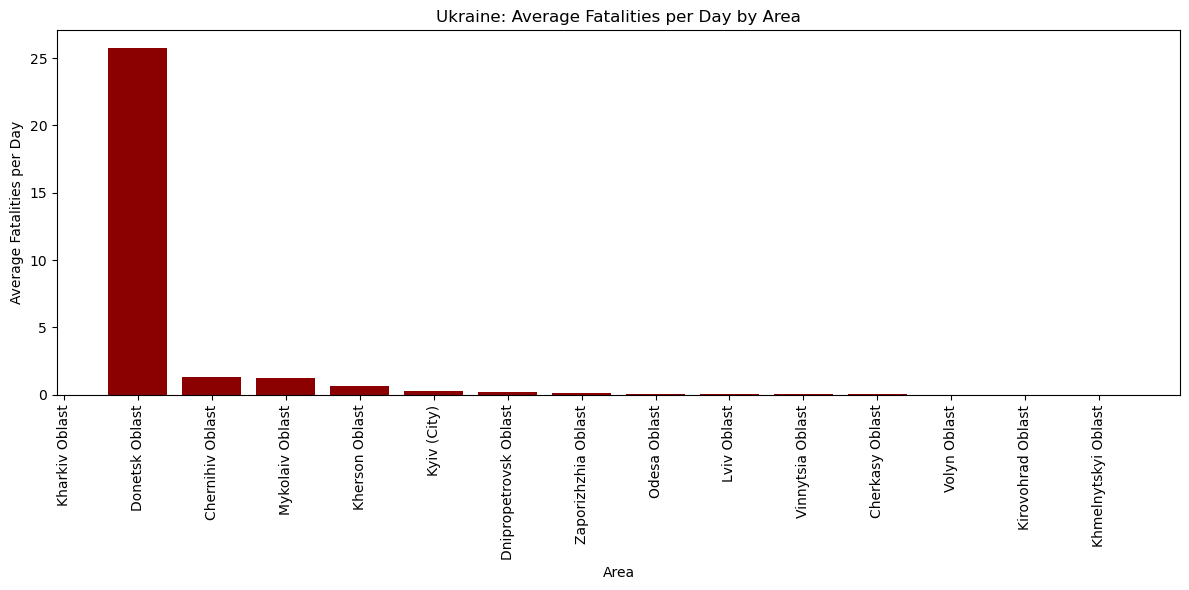

In [87]:
plt.figure(figsize=(12,6))
plt.bar(area_avg['Area'], area_avg['Fatalities_Per_Day'], color='darkred')
plt.xticks(rotation=90)
plt.title('Ukraine: Average Fatalities per Day by Area')
plt.xlabel('Area')
plt.ylabel('Average Fatalities per Day')
plt.tight_layout()
plt.show()


In [113]:
df_ukr.to_csv('ukraine-civilian-preprocessed.csv')
df_rus.to_csv('russia-civilian-preprocessed.csv')